In [14]:
"""
#Start by connecting gdrive into the google colab

from google.colab import drive

drive.mount('/content/gdrive')
"""

"\n#Start by connecting gdrive into the google colab\n\nfrom google.colab import drive\n\ndrive.mount('/content/gdrive')\n"

In [1]:
# %cd /content/gdrive/MyDrive/6768

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

# Loading the Data Set

In [3]:
df = pd.read_csv("fer2013.csv")
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
# Labeling the emotions
label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happy', 4: 'sad', 5: 'surprise', 6: 'neutral'} 

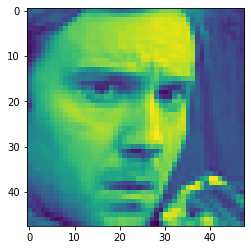

In [5]:
plt.imshow(np.array(df.pixels.loc[0].split(' ')).reshape(48,48).astype('float'))

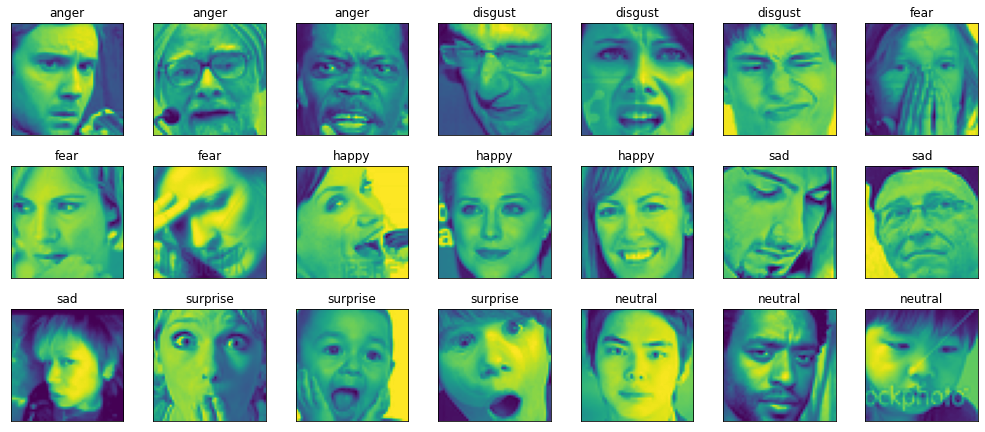

In [6]:
# To visualizethe data set
fig = plt.figure(1, (14, 14))
k = 0
for label in sorted(df.emotion.unique()):
    for j in range(3):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_to_text[label])
        plt.tight_layout()

In [7]:
# Spliting and declaring the image size
img_array=df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48).astype('float32'))

In [8]:
 img_array = np.stack(img_array,axis=0)

In [9]:
img_array.shape

(35887, 48, 48)

In [10]:
img_array

array([[[ 70.,  80.,  82., ...,  52.,  43.,  41.],
        [ 65.,  61.,  58., ...,  56.,  52.,  44.],
        [ 50.,  43.,  54., ...,  49.,  56.,  47.],
        ...,
        [ 91.,  65.,  42., ...,  72.,  56.,  43.],
        [ 77.,  82.,  79., ..., 105.,  70.,  46.],
        [ 77.,  72.,  84., ..., 106., 109.,  82.]],

       [[151., 150., 147., ..., 129., 140., 120.],
        [151., 149., 149., ..., 122., 141., 137.],
        [151., 151., 156., ..., 109., 123., 146.],
        ...,
        [188., 188., 121., ..., 185., 185., 186.],
        [188., 187., 196., ..., 186., 182., 187.],
        [186., 184., 185., ..., 193., 183., 184.]],

       [[231., 212., 156., ...,  44.,  27.,  16.],
        [229., 175., 148., ...,  27.,  35.,  27.],
        [214., 156., 157., ...,  28.,  22.,  28.],
        ...,
        [241., 245., 250., ...,  57., 101., 146.],
        [246., 250., 252., ...,  78., 105., 162.],
        [250., 251., 250., ...,  88., 110., 152.]],

       ...,

       [[ 17.,  17.,  16

In [11]:
labels= df.emotion.values

In [12]:
img_array -= np.mean(img_array, axis=0)
img_array -= np.std(img_array, axis=0)

img_array -= np.mean(img_array, axis=0)
img_array -= np.std(img_array, axis=0)

In [13]:
img_array

array([[[-132.43881  , -117.93227  , -111.67004  , ..., -140.58823  ,
         -153.72404  , -159.8687   ],
        [-135.77794  , -135.182    , -133.92645  , ..., -134.86624  ,
         -143.1756   , -155.4166   ],
        [-148.98822  , -151.47287  , -136.17819  , ..., -140.11441  ,
         -137.63318  , -151.12738  ],
        ...,
        [-106.098145 , -130.64001  , -152.17389  , ..., -118.17595  ,
         -135.80615  , -150.4728   ],
        [-120.08922  , -113.541405 , -115.05069  , ...,  -85.28263  ,
         -121.81452  , -147.39871  ],
        [-120.06059  , -123.4363   , -109.84145  , ...,  -84.26595  ,
          -82.65347  , -111.19699  ]],

       [[ -51.438805 ,  -47.932266 ,  -46.670036 , ...,  -63.58821  ,
          -56.724045 ,  -80.86869  ],
        [ -49.77793  ,  -47.182014 ,  -42.92646  , ...,  -68.86625  ,
          -54.175606 ,  -62.416595 ],
        [ -47.988213 ,  -43.472855 ,  -34.1782   , ...,  -80.11441  ,
          -70.63318  ,  -52.12738  ],
        ...,


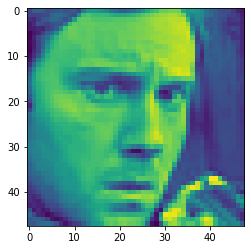

In [14]:
plt.imshow(img_array[0])

In [15]:
# spliting data sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(img_array,labels,test_size=.1)

In [16]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape 

((32298, 48, 48), (32298,), (3589, 48, 48), (3589,))

In [17]:
X_train=X_train/255
X_test=X_test/255

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2

In [19]:
basemodel = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(48,48,1),padding='same'),
                                        tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(48,48,1),padding='same'),
                                        tf.keras.layers.MaxPool2D(2,2),

                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(48,48,1),padding='same'),
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(48,48,1),padding='same'),
                                        tf.keras.layers.MaxPool2D(2,2),

                                        tf.keras.layers.Conv2D(256,(3,3),activation='relu',input_shape=(48,48,1),padding='same'),
                                        tf.keras.layers.Conv2D(256,(3,3),activation='relu',input_shape=(48,48,1),padding='same'),
                                        tf.keras.layers.MaxPool2D(2,2),

                                        tf.keras.layers.Conv2D(512,(3,3),activation='relu',input_shape=(48,48,1),padding='same'),
                                        tf.keras.layers.Conv2D(512,(3,3),activation='relu',input_shape=(48,48,1),padding='same'),
                                        tf.keras.layers.MaxPool2D(2,2),

                                        tf.keras.layers.Conv2D(1024,(3,3),activation='relu',input_shape=(48,48,1),padding='same'),
                                        tf.keras.layers.Conv2D(1024,(3,3),activation='relu',input_shape=(48,48,1),padding='same'),
                                      
                                        #tf.keras.layers.Conv2D(2048,(3,3),activation='relu',input_shape=(48,48,1),padding='same'),
                                        #tf.keras.layers.Conv2D(2048,(3,3),activation='relu',input_shape=(48,48,1),padding='same'),
                                        tf.keras.layers.MaxPool2D(2,2),

                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(units=4096,activation="relu"),
                                        tf.keras.layers.Dense(units=4096,activation="relu"),
                                        tf.keras.layers.Dense(7,activation='selu')

                                        ])                                                                       

In [20]:
basemodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                    

In [21]:

basemodel.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.0001),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
                 

In [22]:
#Saving the Trained model in seperate folder

import os
try:
  os.mkdir('trained')
except:
  pass



In [23]:
file_name = 'CNN_TRAINED.h5'
trained_path=os.path.join('trained',file_name)

call_back = tf.keras.callbacks.ModelCheckpoint(filepath=trained_path, 
                                                 monitor='val_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')


In [ ]:
Cnn_Model=basemodel.fit(X_train,y_train,epochs=50,validation_split=.1,callbacks=call_back)

In [ ]:
# Evaluate the model
loss, acc = basemodel.evaluate(X_train,y_train, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

In [ ]:
Prediction= basemodel.predict(X_test)

In [25]:
from tensorflow import keras
basemodel = keras.models.load_model('trained/CNN_TRAINED.h5')

In [26]:
# Labeling the emotions
Emotion_labels = {'angry': 0, 'disgust': 1, 'fear':2, 'happy':3, 'sad':4, 'surprise':5, 'neutral':6} 

In [27]:
df1 = pd.read_csv("valency.csv")
df1.head(7)

,Emotion,valency
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0
5,5,1
6,6,1


In [28]:
xx = df1.iloc[:,0] 
yy = df1.iloc[:,-1] 

xx=np.array(xx)
yy=np.array(yy)
train_x = xx.reshape(-1,1)
train_y = yy

In [29]:
# RBF kernel Classification
from sklearn.svm import SVC
rbf_val = SVC(kernel='rbf')
rbf_valency=rbf_val.fit(train_x, train_y)

In [30]:
import cv2
img_in= cv2.imread('sad.jfif')


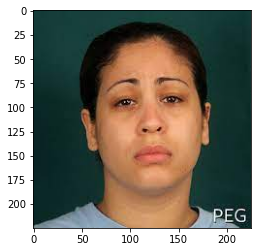

In [31]:
#pip install deepface
from deepface import DeepFace
import cv2
plt.imshow(cv2.cvtColor(img_in,cv2.COLOR_BGR2RGB))

In [32]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [33]:
img_gray = cv2.cvtColor(img_in,cv2.COLOR_BGR2GRAY)
img_gray.shape

(225, 225)

In [34]:
faces = faceCascade.detectMultiScale(img_gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = img_gray[y:y+h, x:x+w]
    roi_color = img_in[y:y+h, x:x+w]
    cv2.rectangle(img_in,(x,y),(x+w, y+h),(255,0,0),2)
    faceses=faceCascade.detectMultiScale(roi_gray)
    if len(faceses)==0:
           print('Face not detected')
    else:
           for(ex,ey,ew,eh)in faceses:
                face_roi = roi_gray[ey: ey+eh, ex:ex + ew]

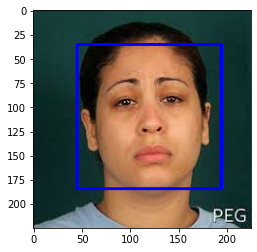

In [35]:
plt.imshow(cv2.cvtColor(img_in,cv2.COLOR_BGR2RGB))

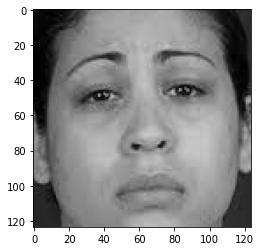

In [36]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [37]:
img__in= cv2.resize(face_roi,(48,48))
img__in= np.expand_dims(img__in,axis=0)
img__in=img__in/255.0

Action: race: 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]   


predicted label is  sad
Valency of the emotion is: [0]


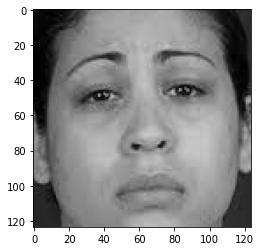

In [38]:
#Emotion and Valency prediction

prediction= basemodel.predict(img__in)
prediction=DeepFace.analyze(img_in)
emotion=prediction['dominant_emotion']
lables = Emotion_labels[emotion]

Result=print('predicted label is ',emotion)
Emotion=np.array(lables)
Emotion=Emotion.reshape(1,-1)
valency_result=rbf_val.predict(Emotion)
print('Valency of the emotion is:',valency_result)

plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))